In [2]:
import pandas as pd
from oct_Utils import *
import seaborn as sns
import matplotlib.pyplot as plt
file_path='/home/octusr3/project/oct/temp/data.csv'
data=pd.read_csv(file_path)


/home/octusr3/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [7]:

df_num = pd.read_csv(f'/home/octusr3/project/oct/temp/df4R_num_pdp.csv')
df_pred = pd.read_csv(f'/home/octusr3/project/oct/temp/df4R_pred_pdp.csv')

In [9]:
class_mapping = {
    0: 1,
    0.005: 1,
    0.01: 1,
    0.02: 1,
    0.05: 1,
    0.95: 0,
    0.98: 0,
    0.99: 0,
    0.995: 0,
    1: 0,
}
valid_cols = [f'l{i}' for i in range(1, 55)]
valid_cols.remove('l26')
valid_cols.remove('l35')
for col in valid_cols:
    df_num[col] = df_num[col].map(class_mapping)
    df_pred[col] = df_pred[col].map(class_mapping)

In [10]:
bupt=pd.DataFrame()
temp={
    True:1,
    False:0
}
for col in valid_cols:
    bupt[col]=df_num[col]!=df_pred[col]
    bupt[col]=bupt[col].map(temp)
bupt['Row_sum'] = bupt.apply(lambda x: x.sum(),axis=1)
data['Row_mistake_sum']=bupt['Row_sum']
test_data=data.sort_values(by='Row_mistake_sum',ascending=False).iloc[0:30]#

In [ ]:
def fill_array(input:str,position):#现在用的都是正正常常的数据，经过重新组织过的数据，序列是对的上的
    

In [19]:
tem=test_data['pred'][2626]
tem=str_to_np_array(tem)

In [20]:
tem

array([27.595255, 27.595255, 25.862278, 25.862278, 25.862278, 27.520193,
       27.520193, 29.265718, 29.265718, 29.265718, 29.265718, 29.265718,
       29.018902, 29.018902, 29.018902, 29.018902, 29.018902, 28.579779,
       28.579779, 28.579779, 28.579779, 28.459429, 29.050554, 27.342527,
       24.671354, 24.94164 , 26.736248, 25.52882 , 26.158762, 26.158762,
       26.158762, 26.686956, 26.686956, 26.686956, 26.87782 , 26.87782 ,
       26.87782 , 27.062649, 27.062649, 27.029581, 27.029581, 27.029581,
       27.029581, 27.029581, 27.10991 , 27.10991 , 27.10991 , 27.10991 ,
       27.10991 , 27.10991 , 25.74389 , 26.1462  , 26.1462  , 26.1462  ])

In [140]:
test_data['num'][2626]

'[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]\n [ 0.  0.  0. 26. 28. 28. 29.  0.  0.  0.]\n [ 0.  0. 28. 29. 27. 25. 27. 26.  0.  0.]\n [ 0. 26. 28. 29. 31. 31. 29. 29. 28.  0.]\n [27. 29. 31. 30. 32. 35. 30.  5. 24.  0.]\n [25. 30. 30. 29. 31. 30. 29. -1. 27.  0.]\n [ 0. 29. 31. 29. 29. 30. 31. 29. 28.  0.]\n [ 0.  0. 25. 29. 29. 29. 31. 28.  0.  0.]\n [ 0.  0.  0. 27. 29. 30. 29.  0.  0.  0.]\n [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]'

In [12]:
num_data=str_to_np_mat(test_data['num'][2626])
pred_data=str_to_np_mat(test_data['pred'][2626])

ValueError: all input arrays must have the same shape

{True: 1, False: 0}

In [15]:
df=pd.DataFrame(num_data)

/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning

matplotlib.axes._subplots.AxesSubplot

/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning

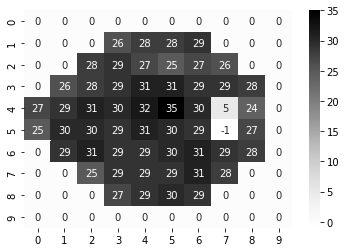

In [16]:
type(sns.heatmap(df,cmap="Greys",annot=True))

In [112]:
test_data['num'].iloc[0]

KeyError: 0

In [90]:
test_data

,image_path,source,pid,dates,eye,pos,num,pd_prob,dataset,pred,statistics,Row_mistake_sum
2626,20210730-中山眼科-OCT转VF/IG/CRC-022-0106/IG010045/...,IG,CRC-022-0106,2019-04-15,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[27.595255 27.595255 25.862278 25.862278 25.86...,0,41.0
8024,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-557/2019...,CASIA数据汇总-new,CS-557,2019-09-29,OS,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,3,[175.53703 175.53703 177.04256 177.04256 177.0...,0,41.0
7967,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-389/2019...,CASIA数据汇总-new,CS-389,2019-08-27,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,3,[150.62874 150.62874 167.22049 167.22049 167.2...,0,41.0
2625,20210730-中山眼科-OCT转VF/IG/CRC-022-0101/IG010146/...,IG,CRC-022-0101,2019-04-11,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[26.950575 26.950575 26.847403 26.847403 26.84...,0,41.0
11327,20210812-sysu-oct/ANGIO2/LBC-0275/20160711/OD/...,ANGIO2,LBC-0275,2016-07-11,OD,disc,[[ 0 0 0 28 25 23 25 0 0 0]\n [ 0 0 23 2...,[[0 0 0 1 1 1 1 0 0 0]\n [0 0 2 1 1 1 1 1 0 0]...,4,[18.105976 18.105976 27.749208 27.749208 27.74...,0,41.0
11326,20210812-sysu-oct/ANGIO2/LBC-0275/20160412/OS/...,ANGIO2,LBC-0275,2016-04-12,OS,disc,[[ 0 0 0 22 23 20 19 0 0 0]\n [ 0 0 18 2...,[[0 0 0 1 1 1 1 0 0 0]\n [0 0 2 2 1 1 1 1 0 0]...,4,[18.520922 18.520922 29.76745 29.76745 29.76...,0,41.0
11325,20210812-sysu-oct/ANGIO2/LBC-0275/20160412/OD/...,ANGIO2,LBC-0275,2016-04-12,OD,disc,[[ 0 0 0 8 12 11 21 0 0 0]\n [ 0 0 9 -...,[[0 0 0 4 3 3 1 0 0 0]\n [0 0 5 5 2 4 1 1 0 0]...,4,[18.713505 18.713505 30.492125 30.492125 30.49...,0,41.0
11324,20210812-sysu-oct/ANGIO2/CRC-016-049/20201120/...,ANGIO2,CRC-016-049,2020-11-20,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,4,[19.142853 19.142853 29.515764 29.515764 29.51...,0,41.0
203,20210730-中山眼科-OCT转VF/IG/CRC-022-0227/IG010259/...,IG,CRC-022-0227,2019-08-22,OS,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 5...,0,[25.990866 25.990866 24.426954 24.426954 24.42...,0,41.0
2483,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-232/2019...,CASIA数据汇总-new,CS-232,2019-06-20,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 3...,1,[28.06835 28.06835 28.110397 28.110397 28.11...,0,40.0


In [71]:
bupt
bupt.sort_values(by='Row_sum',ascending=False).iloc[0:30]


,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,...,l46,l47,l48,l49,l50,l51,l52,l53,l54,Row_sum
2626,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,41
8024,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,41
7967,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,41
2625,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,41
11327,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,41
11326,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,41
11325,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,41
11324,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,41
203,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,41
2483,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,40


In [6]:
df4R_num_pd

,id,eye,date,time,age,type,fpr,fnr,fl,duration,...,l45,l46,l47,l48,l49,l50,l51,l52,l53,l54
0,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-199/2019...,OD,2019-06-12,00:00:00,42.0,pwg,0.02,0.00,0.071429,00:06:00,...,32.0,31.0,34.0,32.0,34.0,33.0,28.0,31.0,31.0,32.0
1,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-199/2019...,OS,2019-06-12,00:00:00,42.0,pwg,0.02,0.04,0.071429,00:06:00,...,30.0,32.0,30.0,32.0,32.0,31.0,31.0,32.0,32.0,28.0
2,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-201/2019...,OD,2019-06-13,00:00:00,54.0,pwg,0.00,0.00,0.000000,00:06:00,...,31.0,29.0,29.0,30.0,30.0,31.0,27.0,28.0,28.0,31.0
3,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-201/2019...,OS,2019-06-13,00:00:00,54.0,pwg,0.00,0.00,0.153846,00:06:00,...,29.0,26.0,27.0,32.0,32.0,29.0,27.0,29.0,32.0,32.0
4,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-204/2019...,OD,2019-06-13,00:00:00,54.0,pwg,0.00,0.04,0.071429,00:06:00,...,28.0,33.0,33.0,30.0,29.0,32.0,28.0,29.0,32.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13284,20210820-sysu-oct/MAGIC4/MAGIC2238/20210628/OS...,OS,2021-06-28,00:00:00,64.0,pwg,0.02,0.03,0.000000,00:06:00,...,28.0,31.0,30.0,30.0,29.0,30.0,30.0,30.0,31.0,32.0
13285,20210820-sysu-oct/MAGIC4/MAGIC2242/20210713/OD...,OD,2021-07-13,00:00:00,55.0,pwg,0.01,0.05,0.125000,00:06:00,...,22.0,26.0,30.0,31.0,28.0,32.0,29.0,24.0,28.0,26.0
13286,20210820-sysu-oct/MAGIC4/MAGIC2242/20210713/OD...,OD,2021-07-13,00:00:00,55.0,pwg,0.01,0.05,0.125000,00:06:00,...,22.0,26.0,30.0,31.0,28.0,32.0,29.0,24.0,28.0,26.0
13287,20210820-sysu-oct/MAGIC4/MAGIC2242/20210713/OS...,OS,2021-07-13,00:00:00,55.0,pwg,0.05,0.05,0.133333,00:06:00,...,30.0,29.0,27.0,25.0,30.0,29.0,29.0,22.0,25.0,32.0
